### Numerical Data Scaling Methods
### Both normalization and standardization can be achieved using the scikit-learn library.


**Data Normalization**
Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.



A value is normalized as follows:

**y = (x – min) / (max – min)**

Where the minimum and maximum values pertain to the value x being normalized.

For example, for a dataset, we could guesstimate the min and max observable values as 30 and -10. We can then normalize any value, as follows:

    y = (x – min) / (max – min)
    y = (18.8 – (-10)) / (30 – (-10))
    y = 28.8 / 40
    y = 0.72

You can see that if an x value is provided that is outside the bounds of the minimum and maximum values, the resulting value will not be in the range of **0 and 1**. You could check for these observations prior to making predictions and either remove them from the dataset or limit them to the pre-defined maximum or minimum values.

You can normalize your dataset using the scikit-learn object **MinMaxScaler.**

Good practice usage with the MinMaxScaler and other scaling techniques is as follows:

- Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. **This is done by calling the fit() function.**
- Apply the scale to training data. This means you can use the normalized data to train your model. **This is done by calling the transform() function.**
- Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions.
- The default scale for the MinMaxScaler is to rescale variables into the range [0,1], although a preferred scale can be specified via the “feature_range” argument and specify a tuple, including the min and the max for all variables.

We can demonstrate the usage of this class by converting two variables to a range 0-to-1, the default range for normalization. The first variable has values between about 4 and 100, the second has values between about 0.1 and 0.001.

The complete example is listed below.

The complete example is listed below.

### example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)

scaler = MinMaxScaler()

scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


**Data Standardization**

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.


A value is standardized as follows:

    y = (x – mean) / standard_deviation
    Where the mean is calculated as:

    mean = sum(x) / count(x)
    And the standard_deviation is calculated as:
    standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))
    
We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the first value of 20.7 as follows:

    y = (x – mean) / standard_deviation
    y = (20.7 – 10) / 5
    y = (10.7) / 5
    y = 2.14

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

You can standardize your dataset using the scikit-learn object StandardScaler.


The complete example is listed below.

### example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler

data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)

scaler = StandardScaler()

scaled = scaler.fit_transform(data)
print(scaled)


[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]



(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

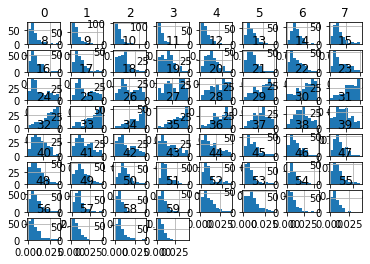

In [8]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.160047   
std      0.167175    0.187767    0.175311    0.1

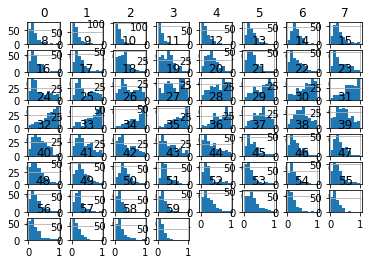

In [9]:
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

                 0             1             2             3             4   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean  -3.936488e-17 -3.109158e-17 -1.030159e-16 -1.579933e-16 -7.259151e-17   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00   
min   -1.206158e+00 -1.150725e+00 -1.104253e+00 -1.036115e+00 -1.236093e+00   
25%   -6.894939e-01 -6.686781e-01 -6.490624e-01 -6.359298e-01 -6.703975e-01   
50%   -2.774703e-01 -2.322506e-01 -2.486515e-01 -2.120457e-01 -2.292089e-01   
75%    2.784345e-01  2.893335e-01  3.682681e-01  2.285353e-01  4.524231e-01   
max    4.706053e+00  5.944643e+00  6.836142e+00  8.025419e+00  5.878863e+00   

                 5             6             7             8             9   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean  -2.241796e-17  1.889514e-16  1.270018e-16  2.068324e-18 -6.111564e-17   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.

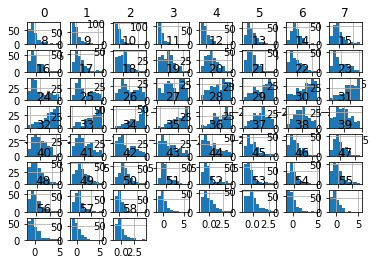

In [10]:
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()